# ABOVE AC9 Data Processing  

## Checking Sample Replicates - Manually remove poor samples

**Authors:** Catherine Kuhn, Elena Terzić and Anna Simpson

**Last Updated:** September 17th, 2018

### Import libraries

In [1]:
### Import the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import glob
import os
import sys
import csv
from scipy import interpolate
from os import listdir
from os.path import isfile, join
import matplotlib.gridspec as gridspec

In [2]:
### Create directory for storing figures that show rolling average of standard deviations
parent_directory = os.path.abspath('..')
if not os.path.exists(parent_directory+'/Figures/Check_individual_reps'):
    os.makedirs(parent_directory+'/Figures/Check_individual_reps')

### Functions

#### Plots absorption/attenuation for multiple replicates (combination of site_date, filtered/unfiltered, and a/c)

In [3]:
def plotting_absorption(list_of_files, check='F', title='Title'):
    labels_list = []
    count = 0
    for filename in range(len(list_of_files)): 
            count += 10
            df = pd.read_csv(list_of_files[filename], skiprows = 0, delimiter= '\t')         
            df.reset_index(inplace=True, drop=False)
            df.rename(columns = {'c_mean':'mean', 'a_mean':'mean', 'c_std':'std','a_std':'std'}, inplace = True)
            Sensor, Date, Site, Sample_Type, Abs_Type, Rep, T1, T2= list_of_files[filename].split('/')[-1].split('.')[0].split('_')
            repname = 'Rep '+Rep
            labels_list.append(repname)
            plt.plot('wl','mean',data=df,label=repname)
            #plt.scatter('wl', 'a_mean', data = df)
            plt.errorbar('wl', 'mean', yerr='std', fmt='k-', linewidth=0.5, data = df) 
            if check == 'F':
                pass
            else:
                if 'FLAG' in conf_check[list_of_files[filename]]:
                    plt.text(650, df['mean'].mean(), 'FLAG '+repname, fontsize=15, color="red")
    plt.ylabel('a [1/m]')
    plt.title(title)
    plt.legend(labels_list)
    return plt

In [6]:
from fopt_toolkit import fopt_toolkit as fp

## Inputs

In [7]:
store_figures_for_individ_reps = fp.make_dir('Figures/Check_individual_reps')
store_figures_for_individ_reps = fp.make_dir('Data/2_summary_stats_pass_manual')

In [8]:
metadata_updated_filepath = os.path.abspath('..')+'/Metadata/project_metadata_updated.csv'

In [9]:
metadata_updated_filepath = os.path.abspath('..')+'/Metadata/project_metadata_updated.csv'
replicate_directory_name = '2_summary_stats'
replicate_pass_directory_name = '2_summary_stats_pass_manual'

replicate_files_location = os.path.abspath('..')+'/Data/'+replicate_directory_name
replicate_pass_directory_location = os.path.abspath('..')+'/Data/'+replicate_pass_directory_name

## Read all file paths into dictionary

#### This loop goes through the rows of the metadata file, creates a dictionary in which the keys are date_site and the entries are dictionaries where the keys are SampleType_AnalysisType (example: fil_a) and the entries are lists of file directories.

In [62]:
metadata = pd.read_csv(metadata_updated_filepath, dtype={'Date': object}, skiprows=0, delimiter= '\t')
plotting_dict = {}
conf_check = {}
for index, row in metadata.iterrows():
    Site, Date, Analysis_Type, Sample_Type, Summary_file_path, Conf = row['Site'], row['Date'], row['Analysis_Type'], row['Sample_Type'], row['Summary_file_path'], row['Conf']
    SiteDate = Site+'_'+str(Date)
    Type = Sample_Type+'_'+Analysis_Type
    conf_check[Summary_file_path] = Conf
    if SiteDate not in plotting_dict:
        plotting_dict[SiteDate] = {Type:[Summary_file_path]}
    elif Type not in plotting_dict[SiteDate]:
        plotting_dict[SiteDate][Type] = [Summary_file_path]
    else:
        plotting_dict[SiteDate][Type].append(Summary_file_path)
        

In [63]:
for i in conf_check:
    print conf_check[i]

0.000453523259341
0.000400734740422
0.0020341905892
0.0294218506382
0.0114843004513
0.110556501775
0.398215992135
0.206898705664
0.00244529760452
0.167609265264
0.000337481087615
0.000722020098973
0.000574083743748
0.000437599672411
0.000582544302855
0.289713641699
0.0017141475463
0.0543851713989
0.000292188035404
0.00742118560779
0.000226138781075
0.000576907084471
0.000588413708608
0.00277954765717
0.00132819359062
0.377833812412
0.000563794444304
1.79474694275
0.0239724432364
0.000433434112962
0.000295838113378
0.00132819359062
0.000291070872568
0.00241071030912
0.342532283718
0.00597676270408
0.000449667939355
0.000407796767263
0.000870842537999
0.00130897390599
0.0186417072483
0.000553458547682
0.0136840492624
0.554331500608
0.00169533946015
0.00323381006726
0.00169533946015
0.000511981632229
0.000526745867444
0.0142227642206
0.000755549594535
0.000870842537999
0.000568501179525
0.00520376205291
0.0162309637216
0.000452370469498
0.00300617662071
0.00207990962754
0.00773904736543
0

In [65]:
from math import exp
conf_check_2 = {}
for i in conf_check:
    df = pd.read_csv(i, skiprows = 0, delimiter= '\t')
    df.rename(columns = {'c_std':'std','a_std':'std'}, inplace = True)
    mean_std = float(df['std'].mean())
    if exp(mean_std) > exp(float(conf_check[i])+1):
        conf_check_2[i] = 'FLAG'
    else:
        conf_check_2[i] = ''

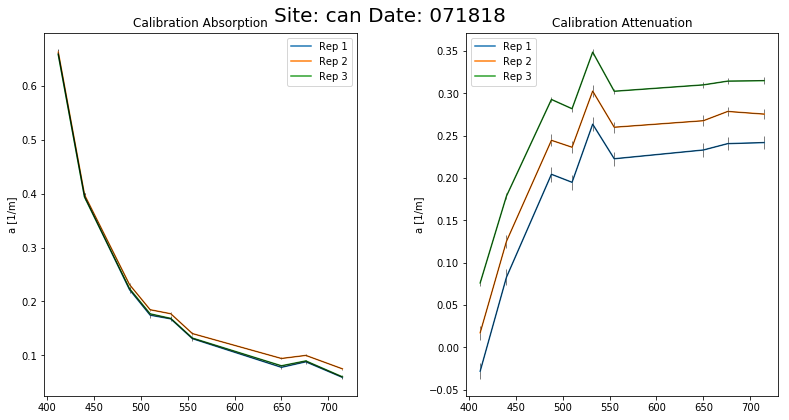

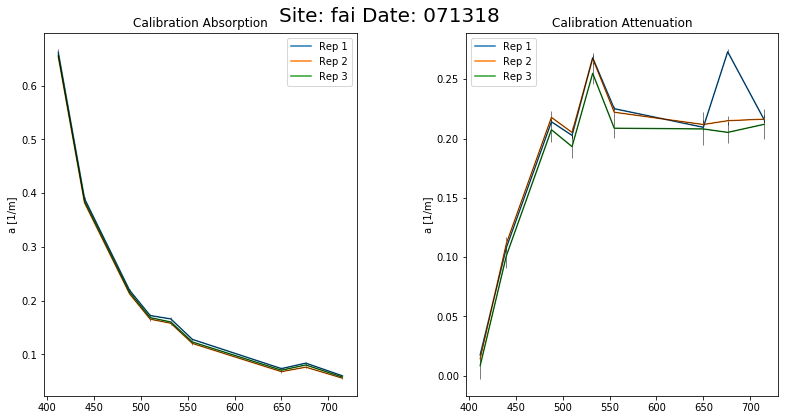

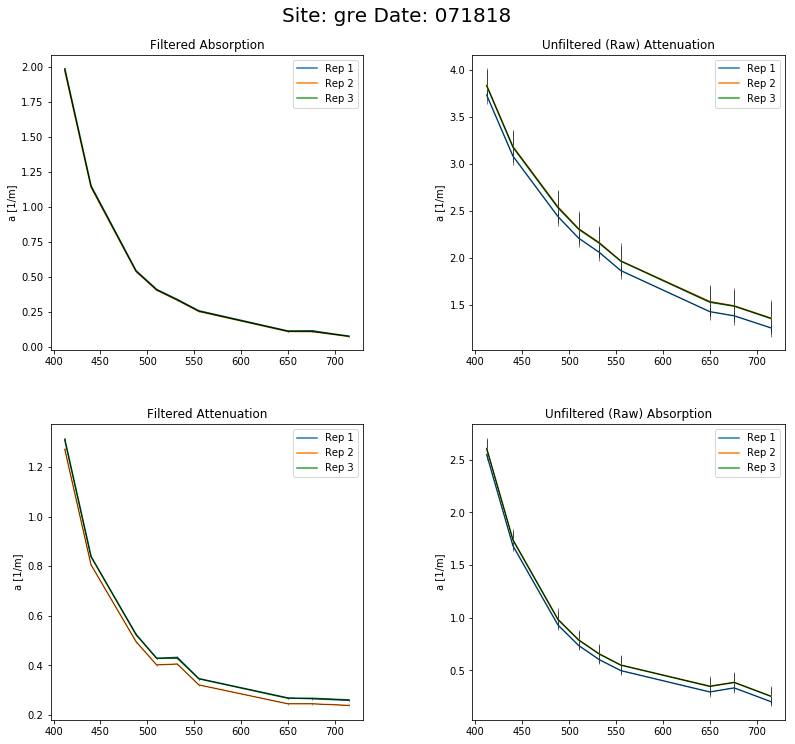

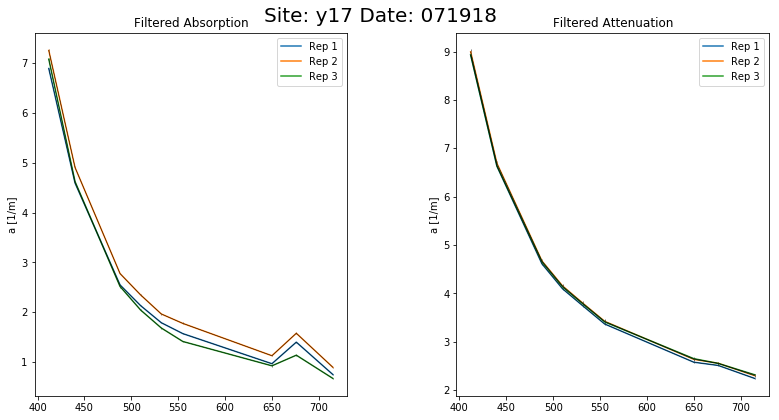

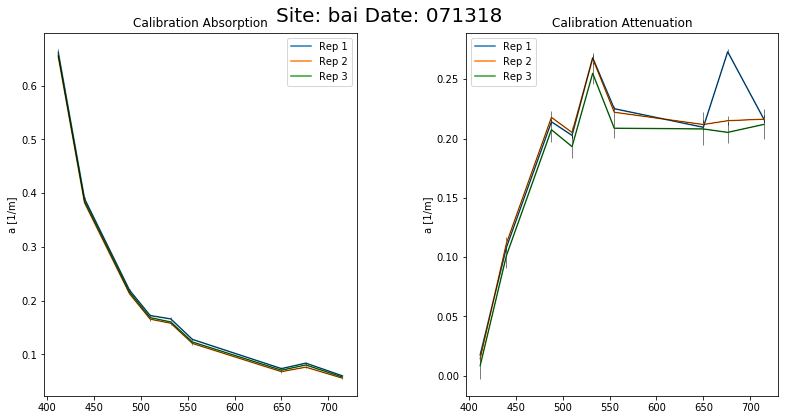

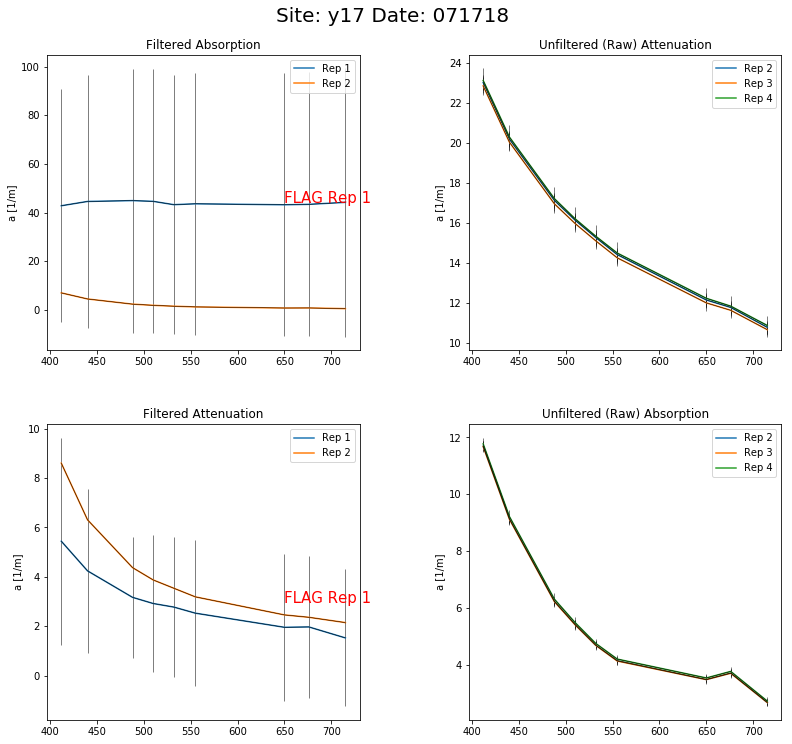

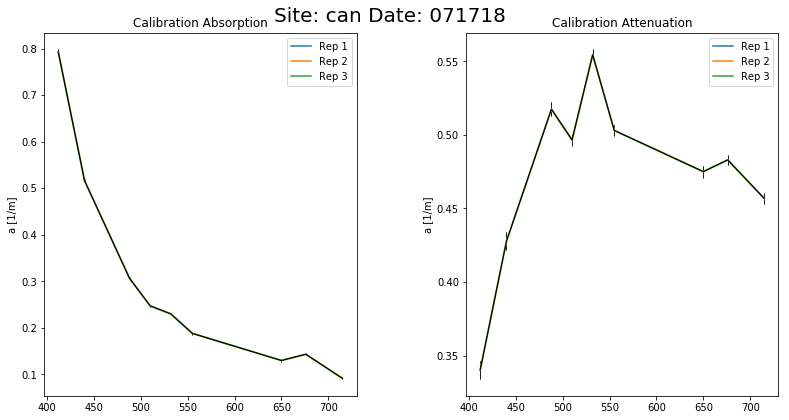

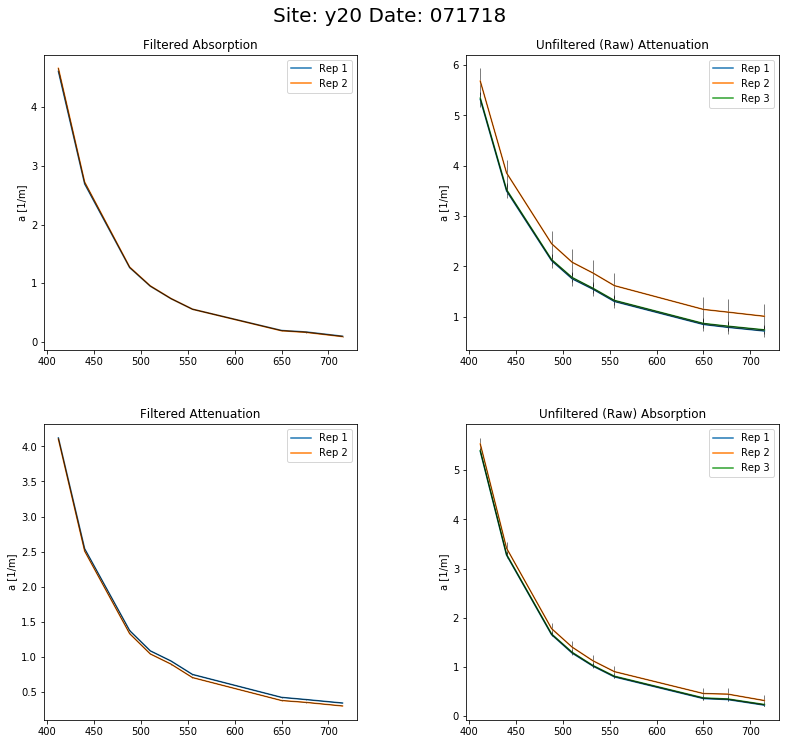

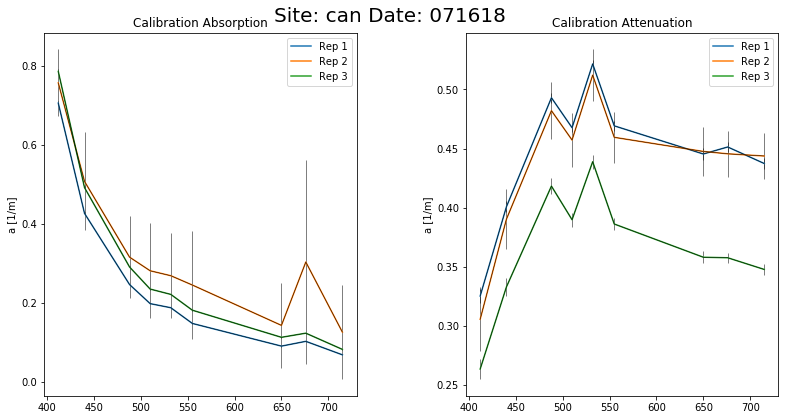

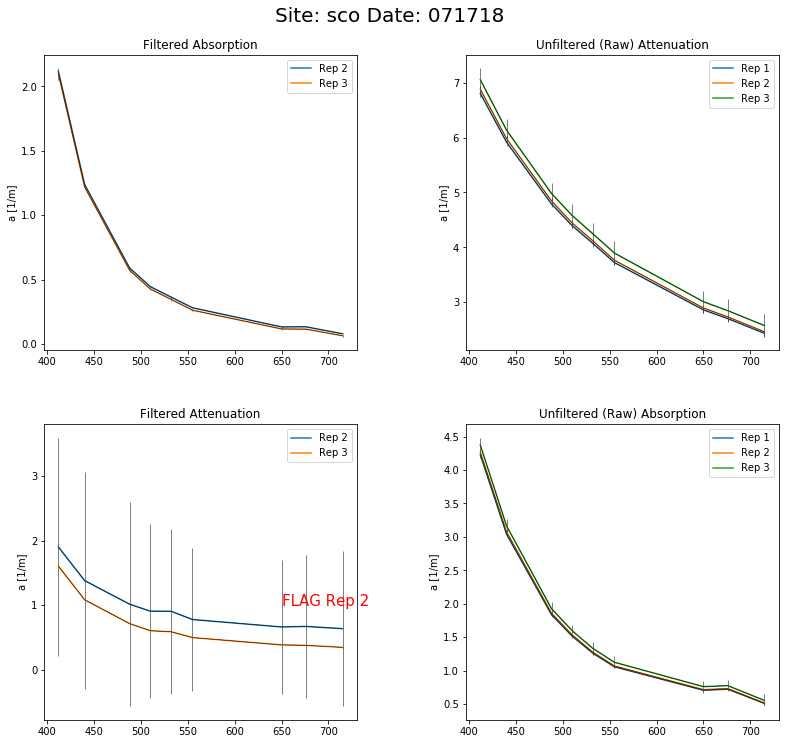

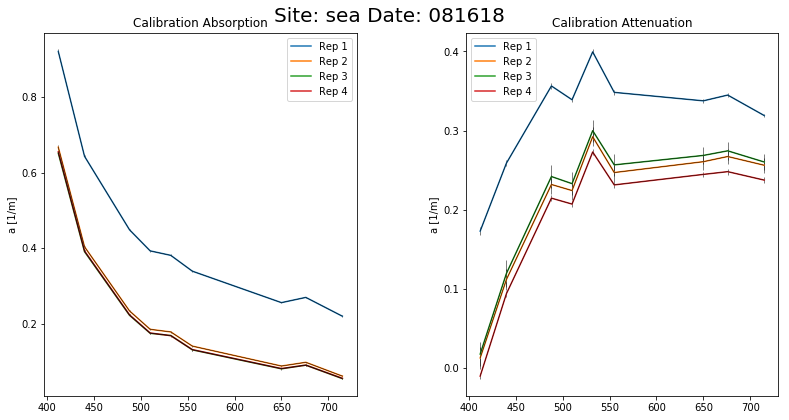

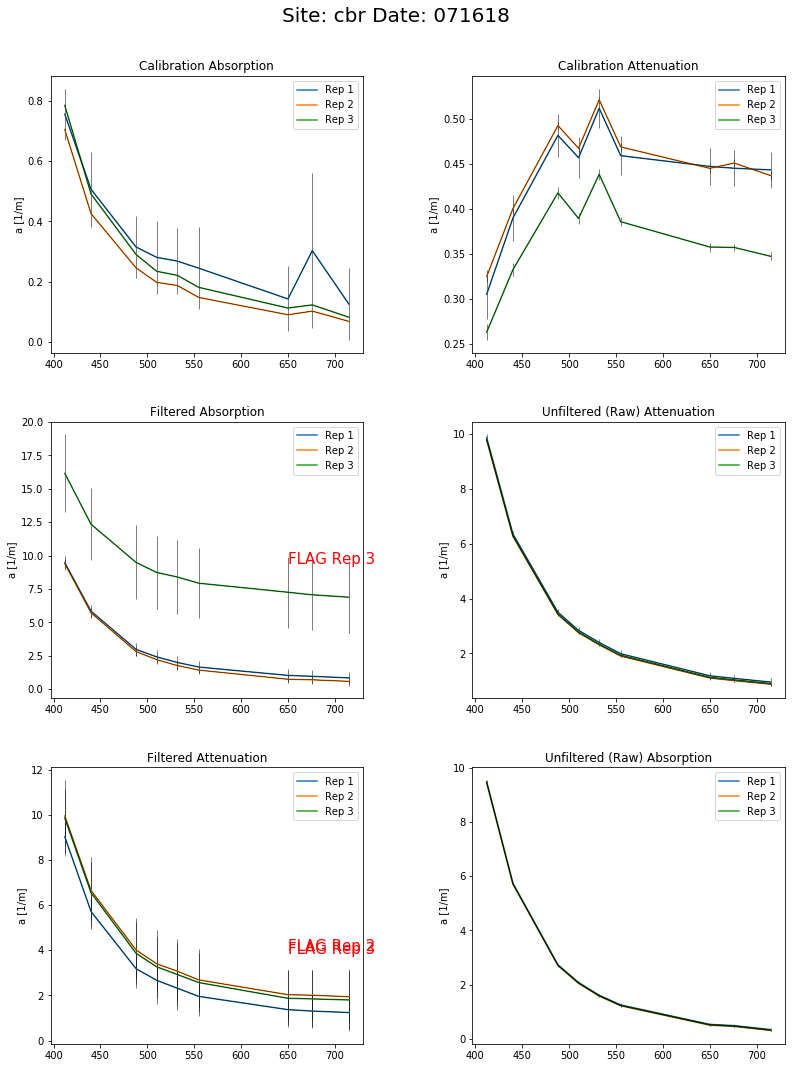

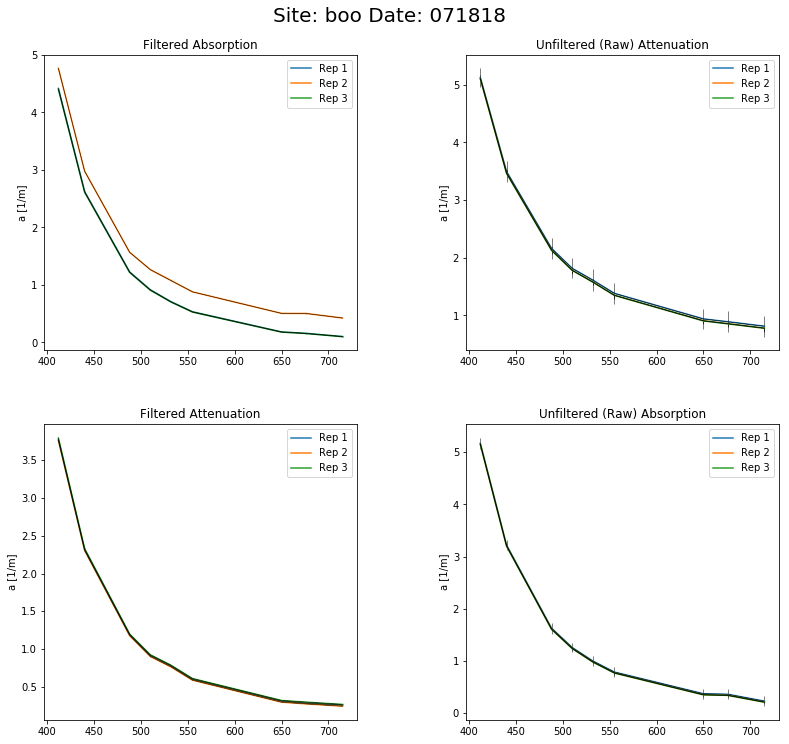

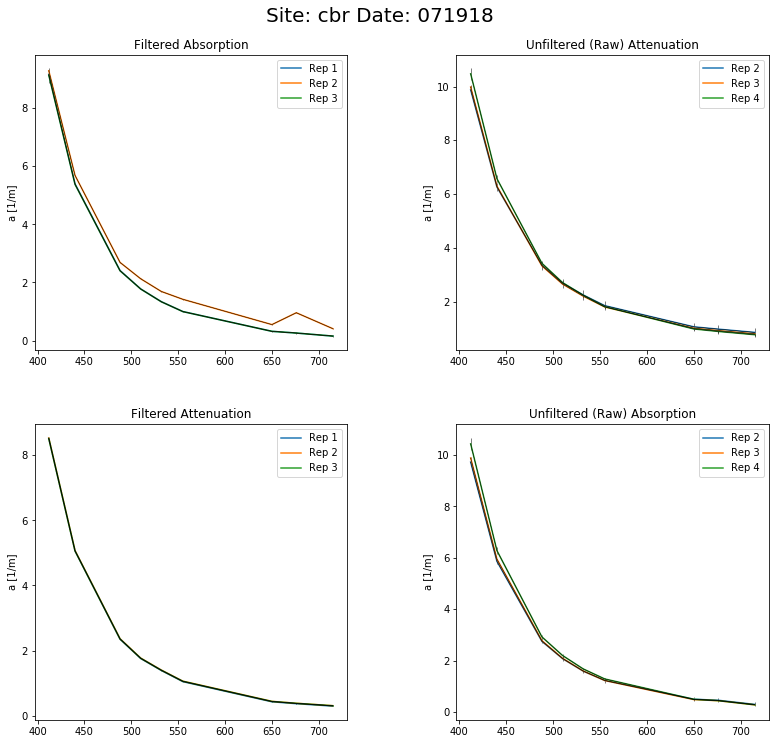

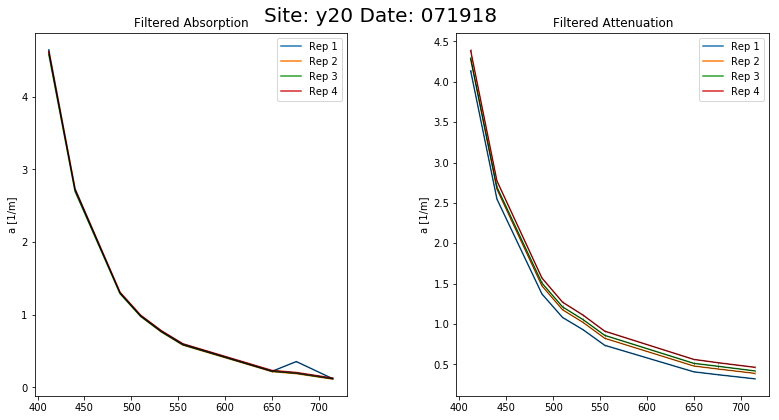

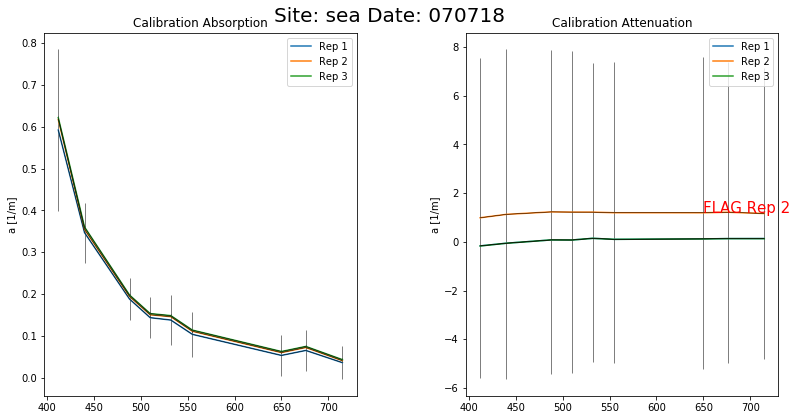

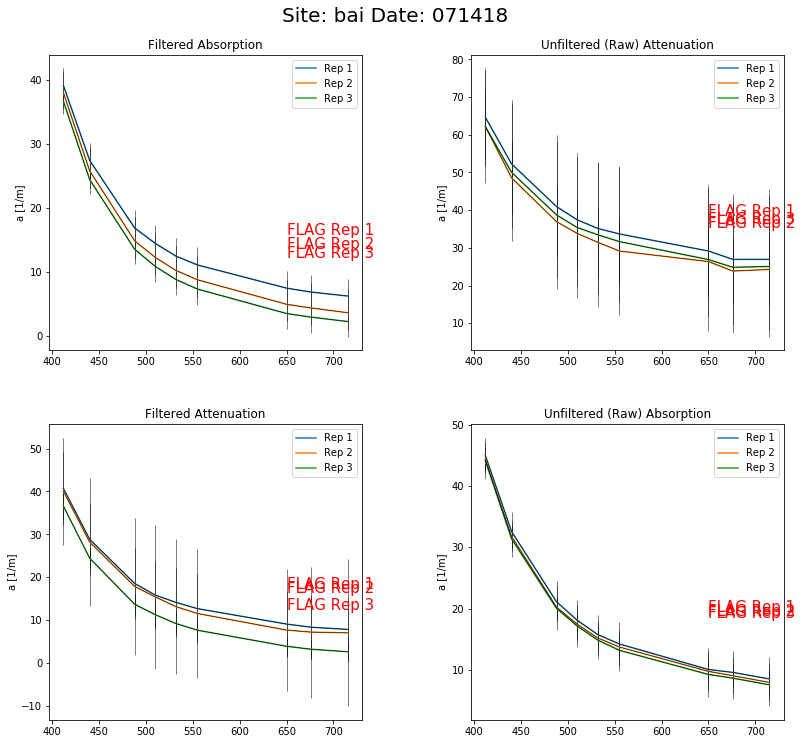

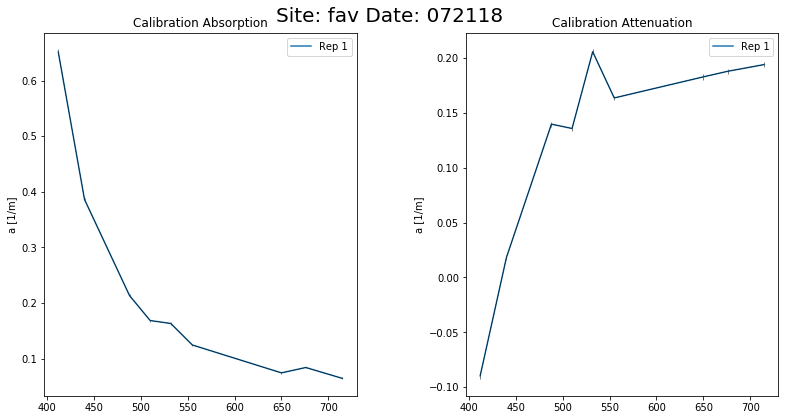

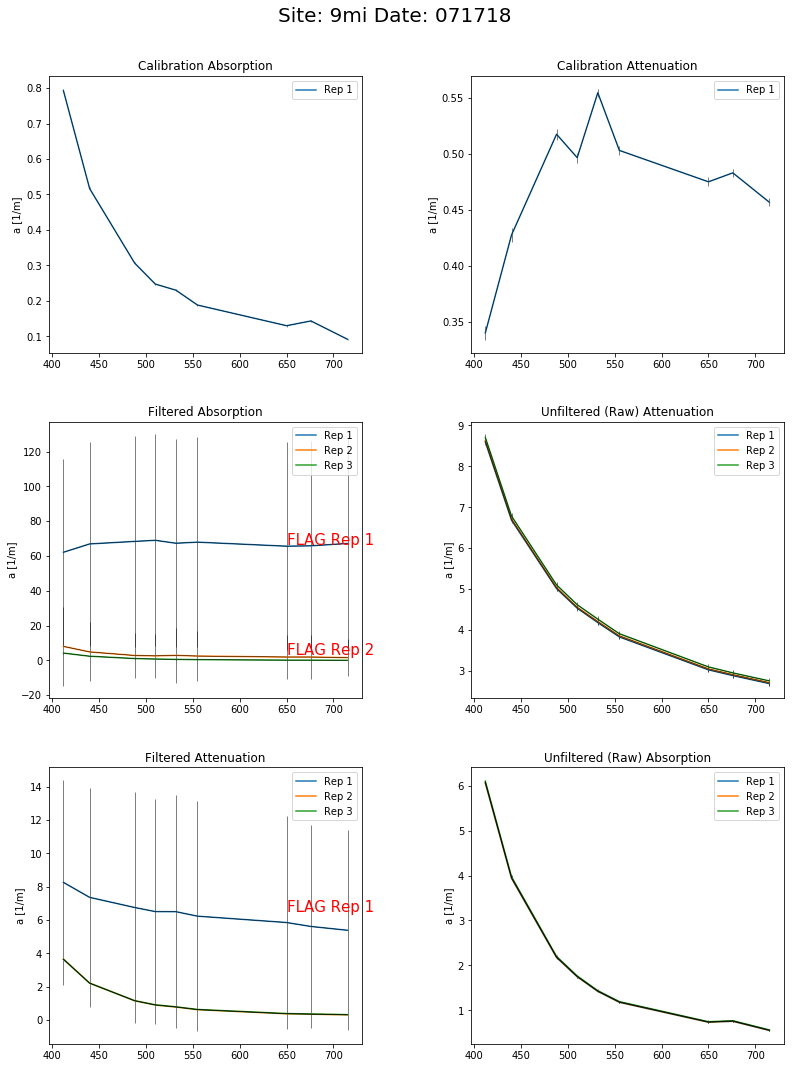

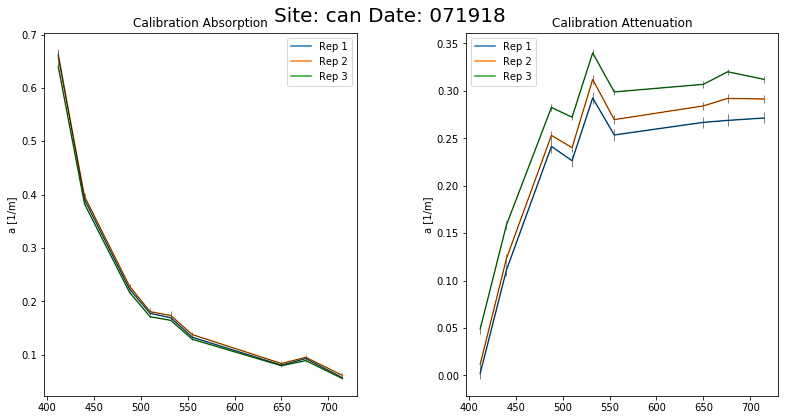

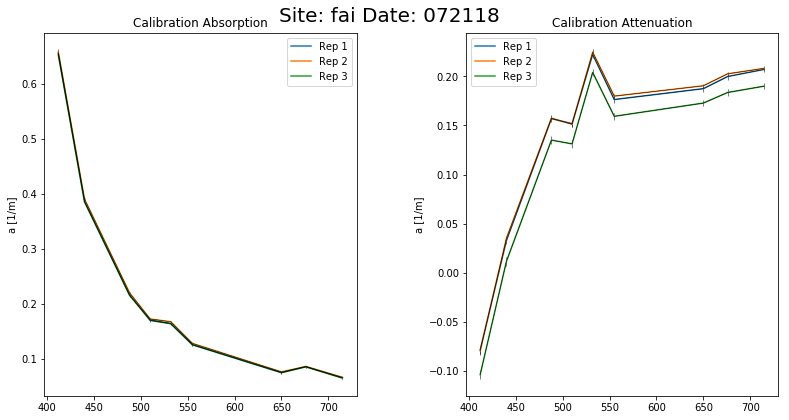

In [68]:
sample_types = {'fil':"Filtered",'raw':'Unfiltered (Raw)','cal':"Calibration"}
abs_types = {'a':'Absorption','c':'Attenuation'}

for i in plotting_dict:
    num_of_plots = len(plotting_dict[i])
    num_of_rows = num_of_plots/2
    count = 0
    Site_all, Date_all = i.split('_')
    plt.subplots(num_of_rows, 2, figsize=(12, 5*num_of_rows+1))
    for sampleid in plotting_dict[i]:
        count += 1
        Sample_Type, Abs_Type = sampleid.split('_')
        plottitle = ' '.join([sample_types[Sample_Type],abs_types[Abs_Type]])
        plt.subplot(num_of_rows, 2, count)    
        my_plot = plotting_absorption(plotting_dict[i][sampleid], check=conf_check_2, title=plottitle)
        #dict_of_sampleids_and_plots[sampleid] = my_plot
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    my_plot.suptitle('Site: '+Site_all+' '+'Date: '+Date_all, fontsize=20)
    my_plot.savefig('../Figures/Check_individual_reps/'+Site_all+'_'+Date_all+'.png', bbox_inches='tight')
    my_plot.show()

## Manual removal

### Function to get sample ids given some information about the samples based on the original metadata categories

** Note: add option (later?) in case multiple sample info variables have identical attributes; i.e. both Rep and Site are described by integers or something. **

** Also Note: here I have Rep and Date coming in as strings. However, one might want sample ids based on a numerical condition as well. Maybe later...**

In [14]:
def get_id(*args):
    list_of_req = [x for x in args]
    metadata_original = pd.read_csv('../Metadata/project_metadata_original.csv', dtype={'Date': object, 'Rep':object}, skiprows=0, delimiter= '\t')
    metadata_original_dict = metadata_original.to_dict('list')
    metadata_original_dict_set = {}
    for i in metadata_original_dict:
        if i == 'ID':
            continue
        else:
            metadata_original_dict_set[i] = [str(k) for k in set(metadata_original_dict[i])]
    metadata_original_subset = metadata_original
    total_count = 0
    for m in list_of_req:
        count = 0
        for j in metadata_original_dict_set:
            if m in metadata_original_dict_set[j]:
                count += 1
                total_count += 1
                print j, m
                metadata_original_subset = metadata_original_subset.loc[(metadata_original_subset[j] == m)]
        if count == 0:
            if len(list_of_req) > 1:
                print 'ERROR: Value',m,'not a possible value. Subsetting by other values.'
            else:
                print 'ERROR: Value',m,'not a possible value.'
            break
    if total_count > 0:
        return [i for i in metadata_original_subset['ID']]
    else:
        return 'ERROR: None of the entered arguments match possible values in the metadata file.'


** Example: **

In [15]:
get_id('y17','071718','fil')

Site y17
Date 071718
Sample_Type fil


['AC9_071718_y17_fil_a_1_T17_4',
 'AC9_071718_y17_fil_a_2_T17_4',
 'AC9_071718_y17_fil_c_1_T17_4',
 'AC9_071718_y17_fil_c_2_T17_4']

In [16]:
metadata_updated = pd.read_csv('../Metadata/project_metadata_updated.csv', dtype={'Date': object, 'Rep':object}, skiprows=0, delimiter= '\t')

#### Get a list of removed samples

In [17]:
r1 = get_id('y17','071718','fil')

Site y17
Date 071718
Sample_Type fil


In [18]:
r2 = get_id('9mi','071718','fil','1')

Site 9mi
Date 071718
Sample_Type fil
Rep 1


In [19]:
r3 = get_id('cbr','071618','fil','a','3')

Site cbr
Date 071618
Sample_Type fil
Analysis_Type a
Rep 3


In [20]:
samples_to_remove = r1+r2+r3

#### Create a new colum in updated metadata for pass for fail on manual removal

In [21]:
metadata_updated['Pass_Manual_Removal'] = 'pass'

#### Label the samples that are to be removed with 'fail'

In [22]:
for i in samples_to_remove:
    metadata_updated.loc[metadata_updated.ID == i, 'Pass_Manual_Removal'] = 'fail'

#### Make a new file for 'passed' samples, put 'pass' samples in it, and update metadata file with new column for pass or fail for manual removal and new filepath for said file

In [23]:
new_path_cleaned = parent_directory+'/Data/2_2_summary_stats_cleaned_MANUAL'
if not os.path.exists(new_path_cleaned):
    os.makedirs(new_path_cleaned)

In [24]:
metadata_updated['Summary_file_path_cleaned_MANUAL'] = ''

In [25]:
for i in metadata_updated['Summary_file_path']:
    if metadata_updated.loc[metadata_updated.Summary_file_path == i, 'Pass_Manual_Removal'].max() == 'pass':
        new_path = new_path_cleaned+'/'+i.split('/')[-1]
        my_command = ' '.join(['cp',i,new_path])
        os.system(my_command)
        metadata_updated.loc[metadata_updated.Summary_file_path == i, 'Summary_file_path_cleaned_MANUAL'] = new_path
    else:
        metadata_updated.loc[metadata_updated.Summary_file_path == i, 'Summary_file_path_cleaned_MANUAL'] = None

In [26]:
metadata_updated.to_csv('../Metadata/project_metadata_updated.csv', sep='\t',index=False)

In [29]:
metadata_updated.head()

,Analysis_Type,Date,ID,Raw_File_Path,Rep,Sample_Type,Sensor,Site,Temp,Cleaned_raw_file_path,Summary_file_path,Conf,Pass_Manual_Removal,Summary_file_path_cleaned_MANUAL,Pass_Second_Removal,Summary_file_path_cleaned_SECOND
0,a,070718,AC9_070718_sea_cal_a_1_T20_6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,1,cal,AC9,sea,20.6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,/Users/Petrichor/Documents/FreshwatersOpticsTo...,0.021394,pass,/Users/Petrichor/Documents/FreshwatersOpticsTo...,pass,/Users/Petrichor/Documents/FreshwatersOpticsTo...
1,a,070718,AC9_070718_sea_cal_a_2_T20_9,/Users/Petrichor/Documents/FreshwatersOpticsTo...,2,cal,AC9,sea,20.9,/Users/Petrichor/Documents/FreshwatersOpticsTo...,/Users/Petrichor/Documents/FreshwatersOpticsTo...,0.000588,pass,/Users/Petrichor/Documents/FreshwatersOpticsTo...,pass,/Users/Petrichor/Documents/FreshwatersOpticsTo...
2,a,070718,AC9_070718_sea_cal_a_3_T20_9,/Users/Petrichor/Documents/FreshwatersOpticsTo...,3,cal,AC9,sea,20.9,/Users/Petrichor/Documents/FreshwatersOpticsTo...,/Users/Petrichor/Documents/FreshwatersOpticsTo...,0.000553,pass,/Users/Petrichor/Documents/FreshwatersOpticsTo...,pass,/Users/Petrichor/Documents/FreshwatersOpticsTo...
3,c,070718,AC9_070718_sea_cal_c_1_T20_6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,1,cal,AC9,sea,20.6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,/Users/Petrichor/Documents/FreshwatersOpticsTo...,0.000296,pass,/Users/Petrichor/Documents/FreshwatersOpticsTo...,pass,/Users/Petrichor/Documents/FreshwatersOpticsTo...
4,c,070718,AC9_070718_sea_cal_c_2_T20_6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,2,cal,AC9,sea,20.6,/Users/Petrichor/Documents/FreshwatersOpticsTo...,/Users/Petrichor/Documents/FreshwatersOpticsTo...,0.554332,pass,/Users/Petrichor/Documents/FreshwatersOpticsTo...,pass,/Users/Petrichor/Documents/FreshwatersOpticsTo...


### Recheck individual reps in case any that should be removed were swamped by even worse reps

#### metadata already loaded as pd dataframe 'metadata_updated'

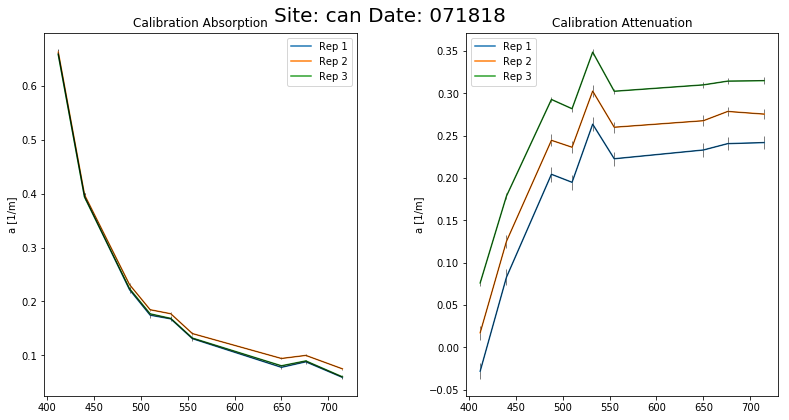

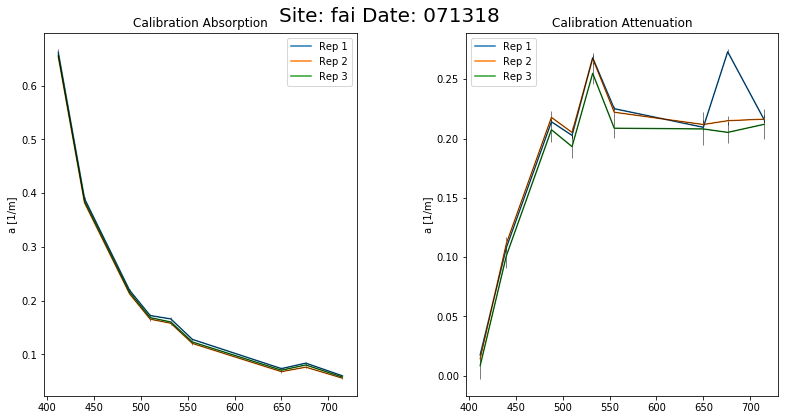

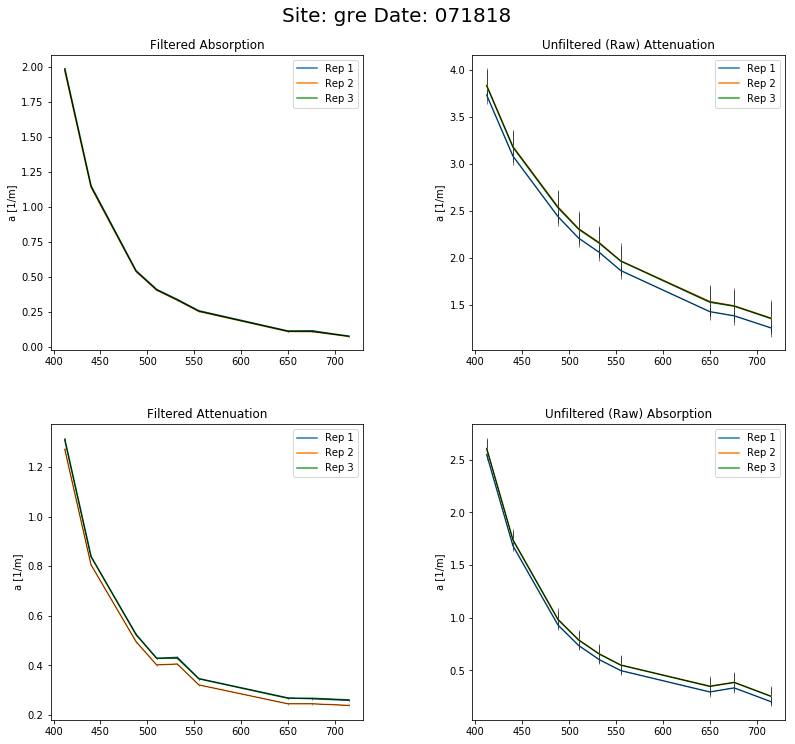

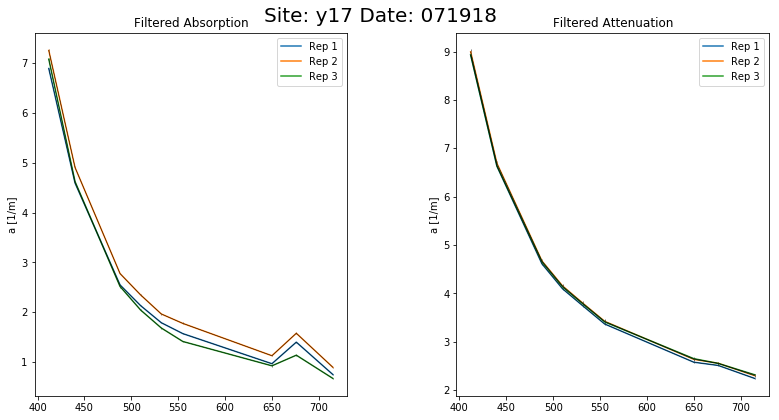

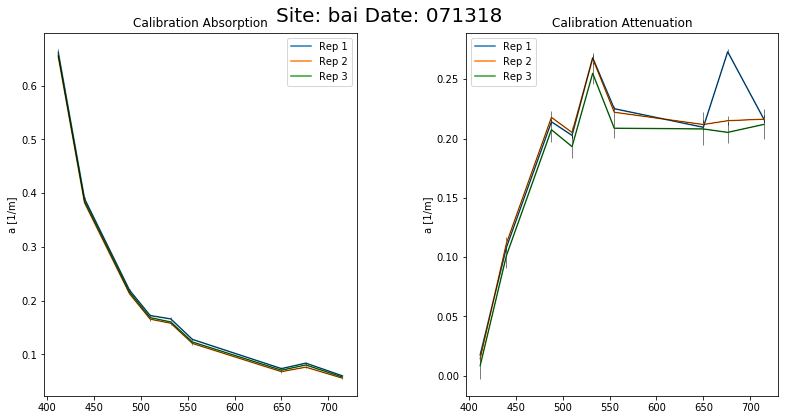

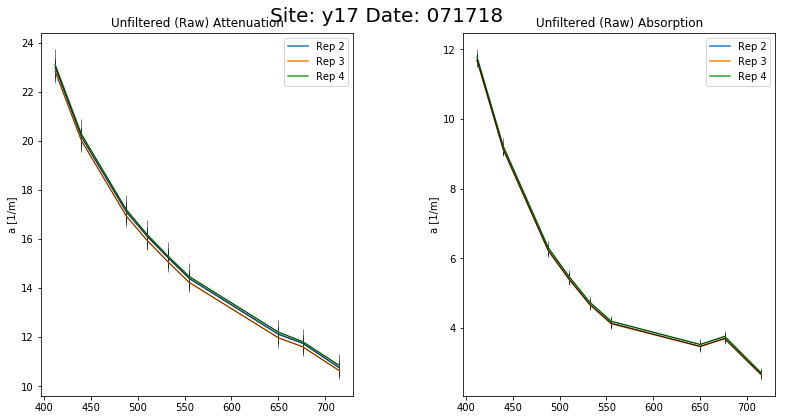

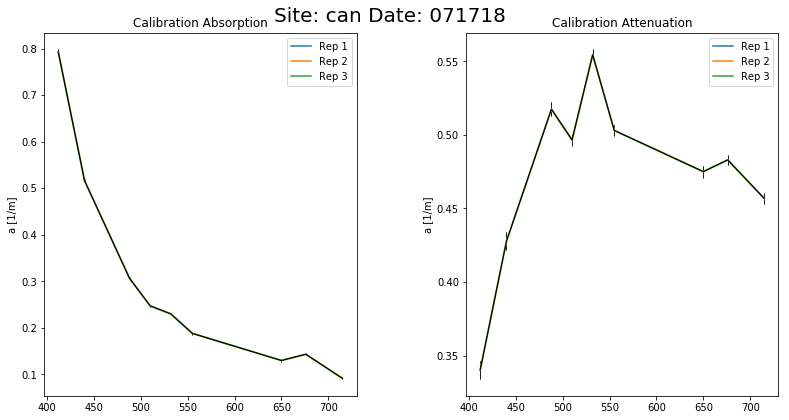

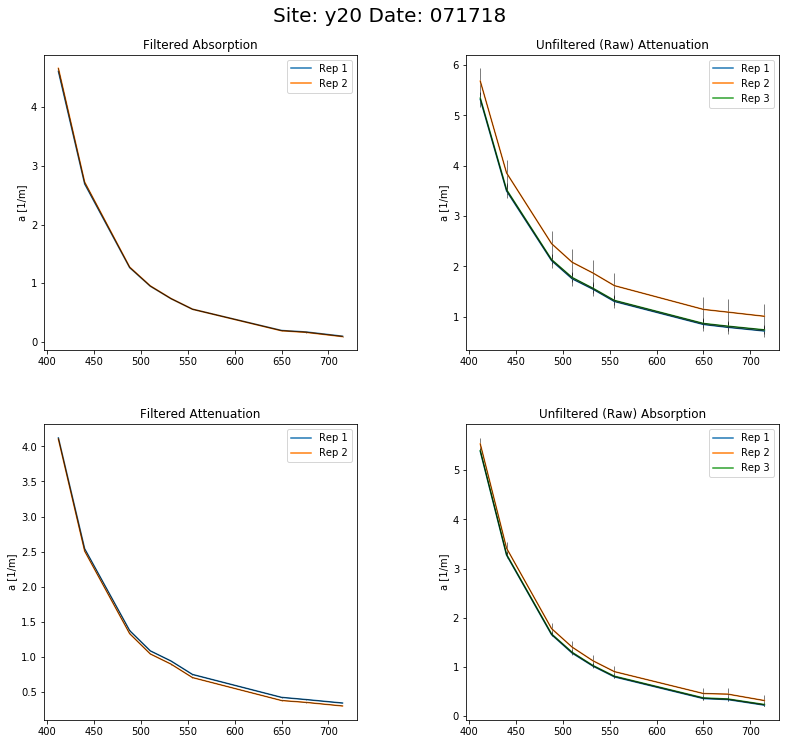

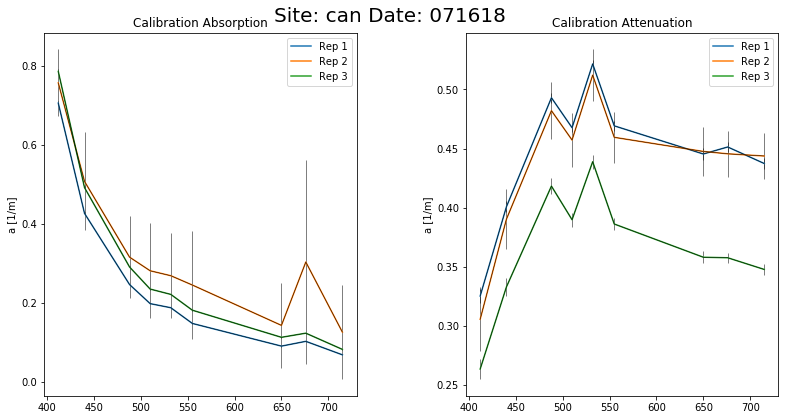

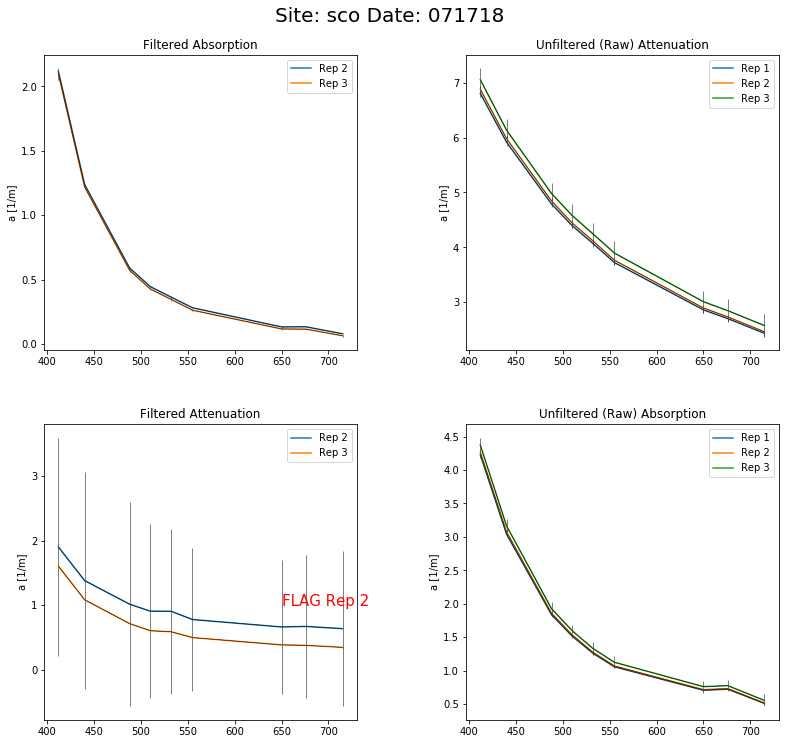

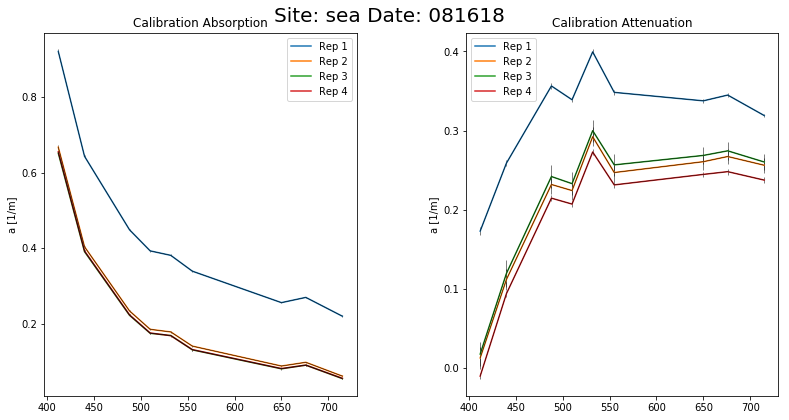

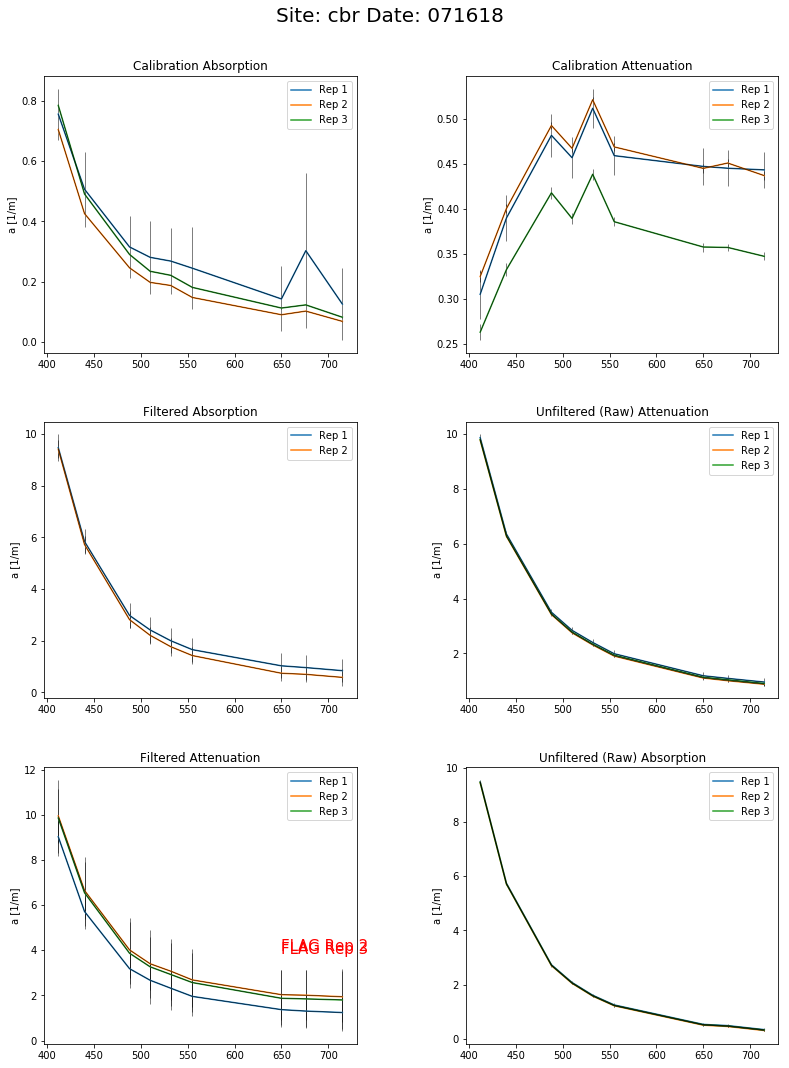

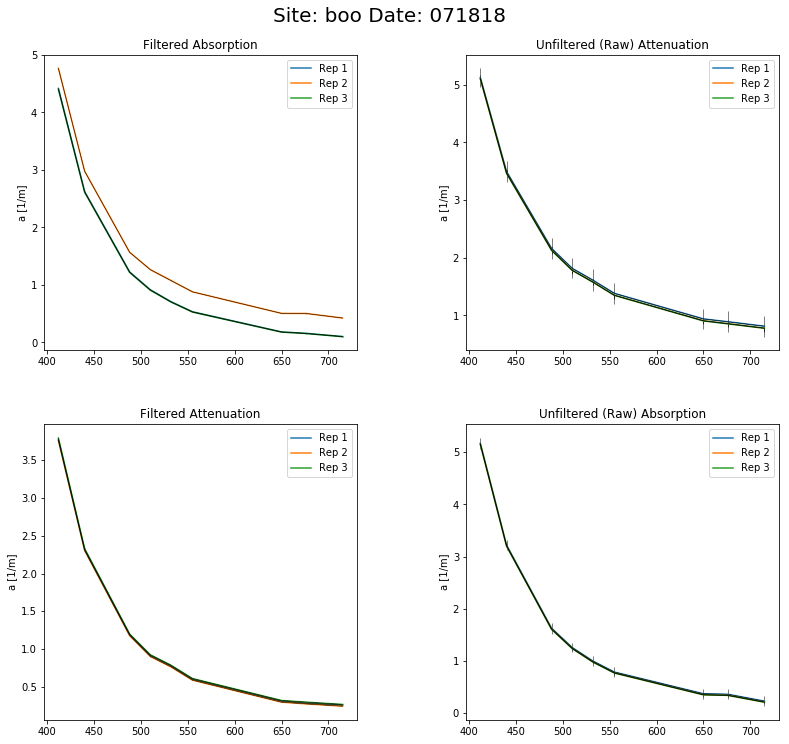

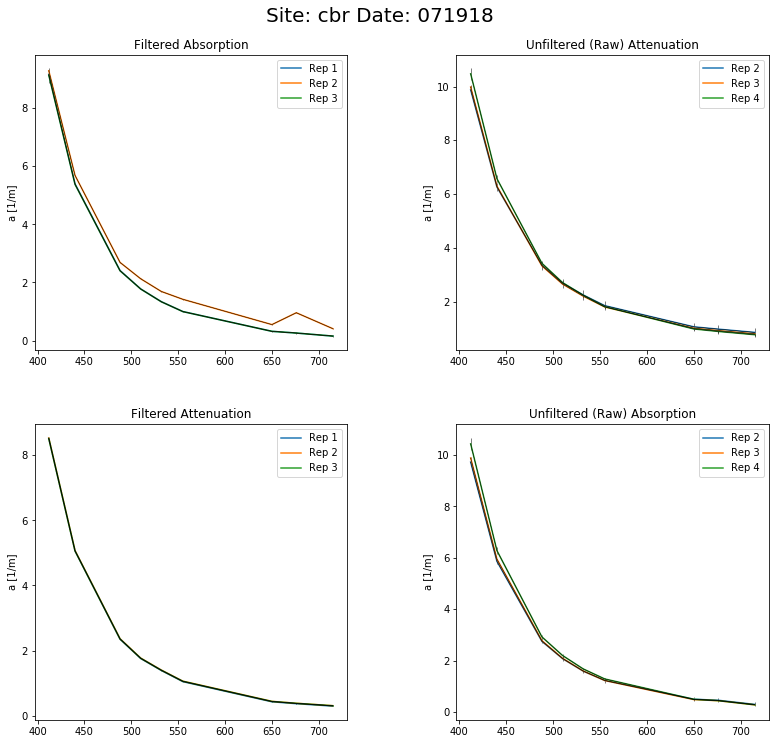

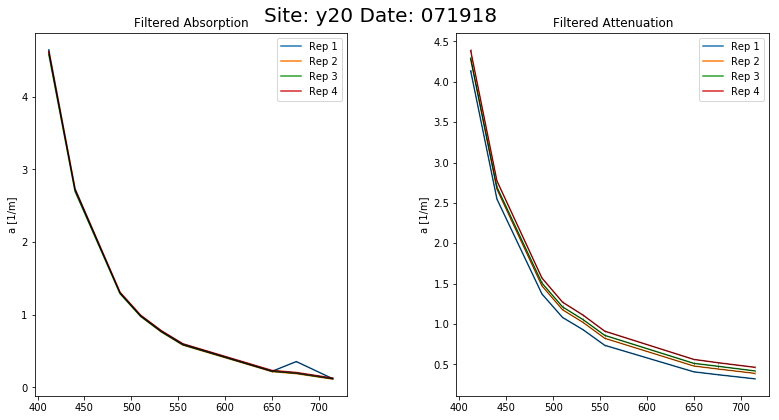

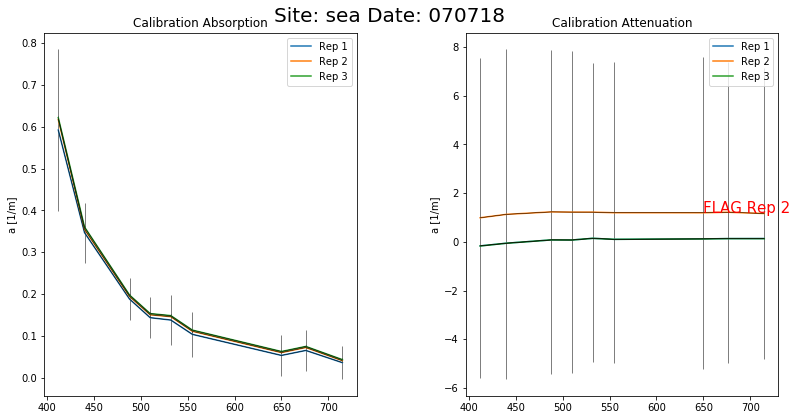

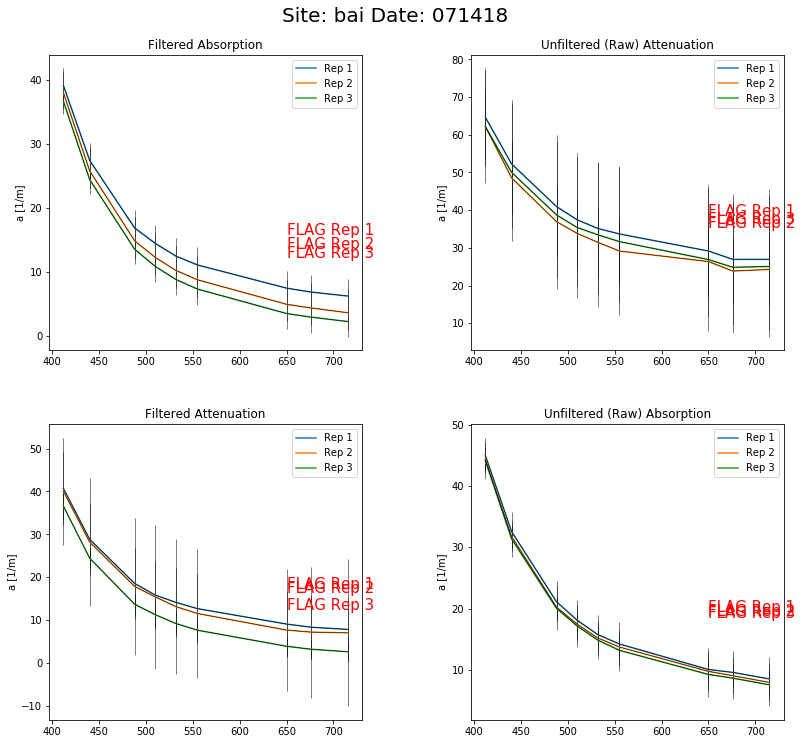

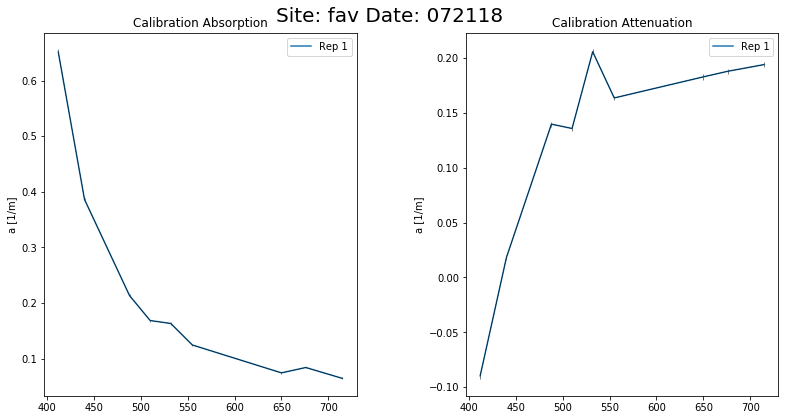

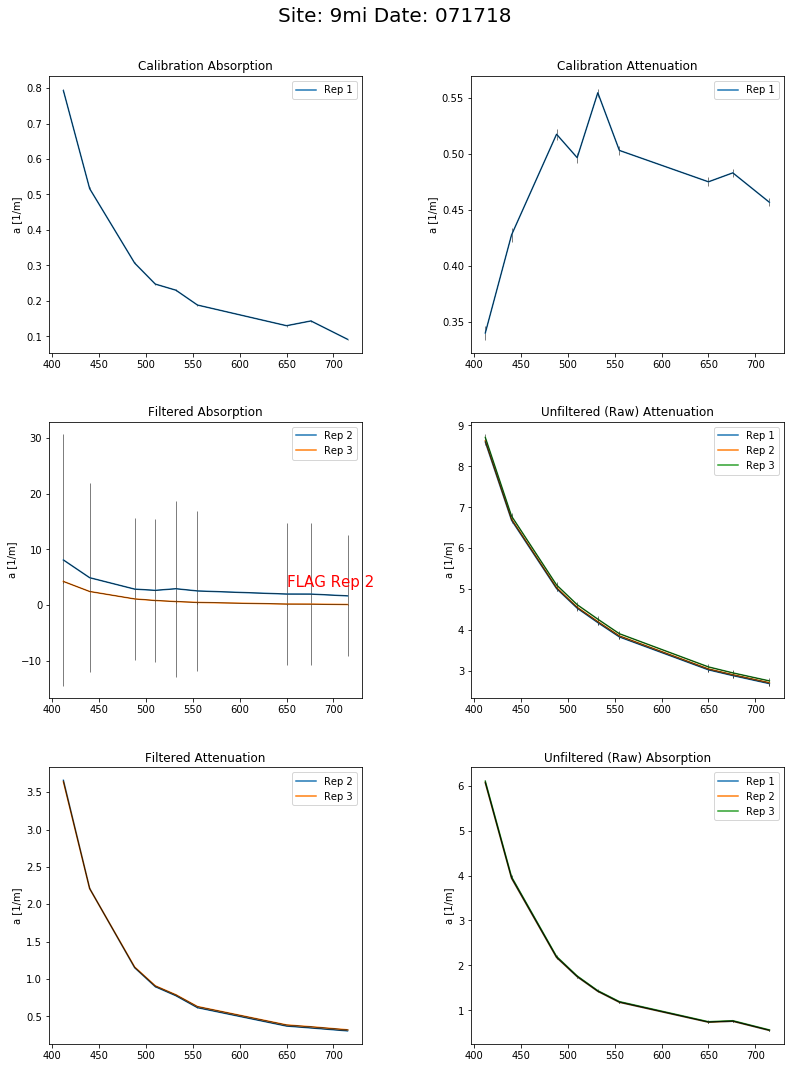

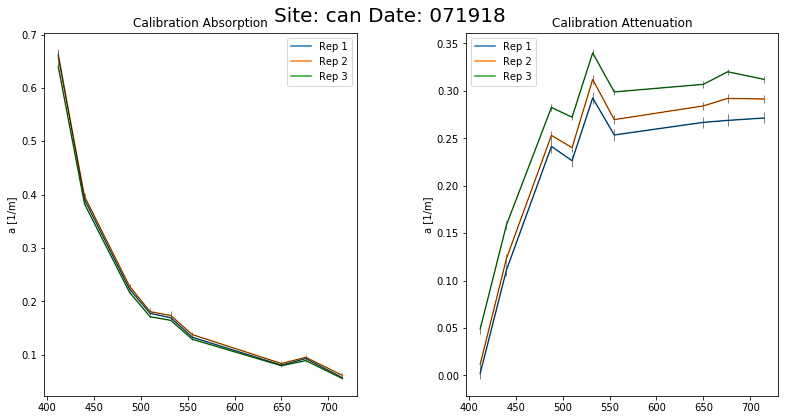

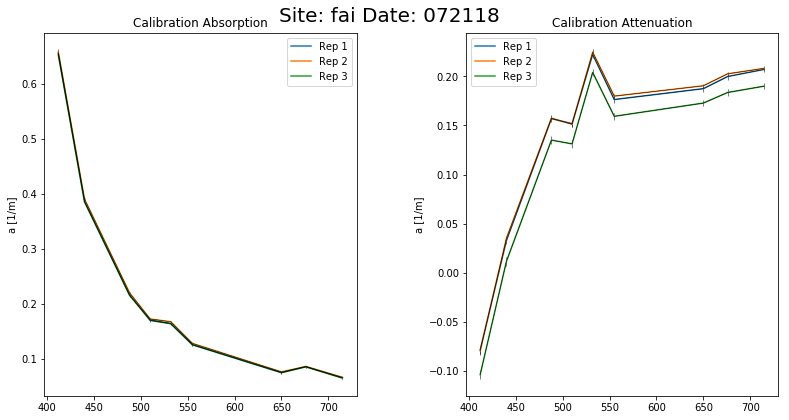

In [69]:
sample_types = {'fil':"Filtered",'raw':'Unfiltered (Raw)','cal':"Calibration"}
abs_types = {'a':'Absorption','c':'Attenuation'}

for i in plotting_dict_update:
    num_of_plots = len(plotting_dict_update[i])
    num_of_rows = num_of_plots/2
    count = 0
    Site_all, Date_all = i.split('_')
    plt.subplots(num_of_rows, 2, figsize=(12, 5*num_of_rows+1))
    for sampleid in plotting_dict_update[i]:
        count += 1
        Sample_Type, Abs_Type = sampleid.split('_')
        plottitle = ' '.join([sample_types[Sample_Type],abs_types[Abs_Type]])
        plt.subplot(num_of_rows, 2, count)    
        my_plot = plotting_absorption(plotting_dict_update[i][sampleid], check=conf_check_2, title=plottitle)
        #dict_of_sampleids_and_plots[sampleid] = my_plot
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    my_plot.suptitle('Site: '+Site_all+' '+'Date: '+Date_all, fontsize=20)
    my_plot.savefig('../Figures/Check_individual_reps/'+Site_all+'_'+Date_all+'.png', bbox_inches='tight')
    my_plot.show()